In [17]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn import tree
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 300

# Libraries for Classification models
from sklearn.tree import DecisionTreeClassifier

In [8]:
df = pd.read_csv('german_credit_data.csv')

In [9]:
#show data frame
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [10]:
# replace null values with unknown
df= df.fillna('unknown')

In [11]:
#drop the unnamed feature
df.drop('Unnamed: 0', axis=1, inplace=True)
categorical_features = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']
#labelencode the categorical features
for i, cat in enumerate(categorical_features):
    df[cat] = LabelEncoder().fit_transform(df[cat])

In [12]:
#show new df
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,4,0,1169,6,5,1
1,22,0,2,1,0,1,5951,48,5,0
2,49,1,1,1,0,3,2096,12,3,1
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,0


In [13]:
X = df.drop('Risk', axis=1)
y = df['Risk']
scaler = StandardScaler()
X = scaler.fit_transform(X)
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)

In [14]:
tree_depth = clf.get_depth()
print("Tree depth:", tree_depth)

Tree depth: 23


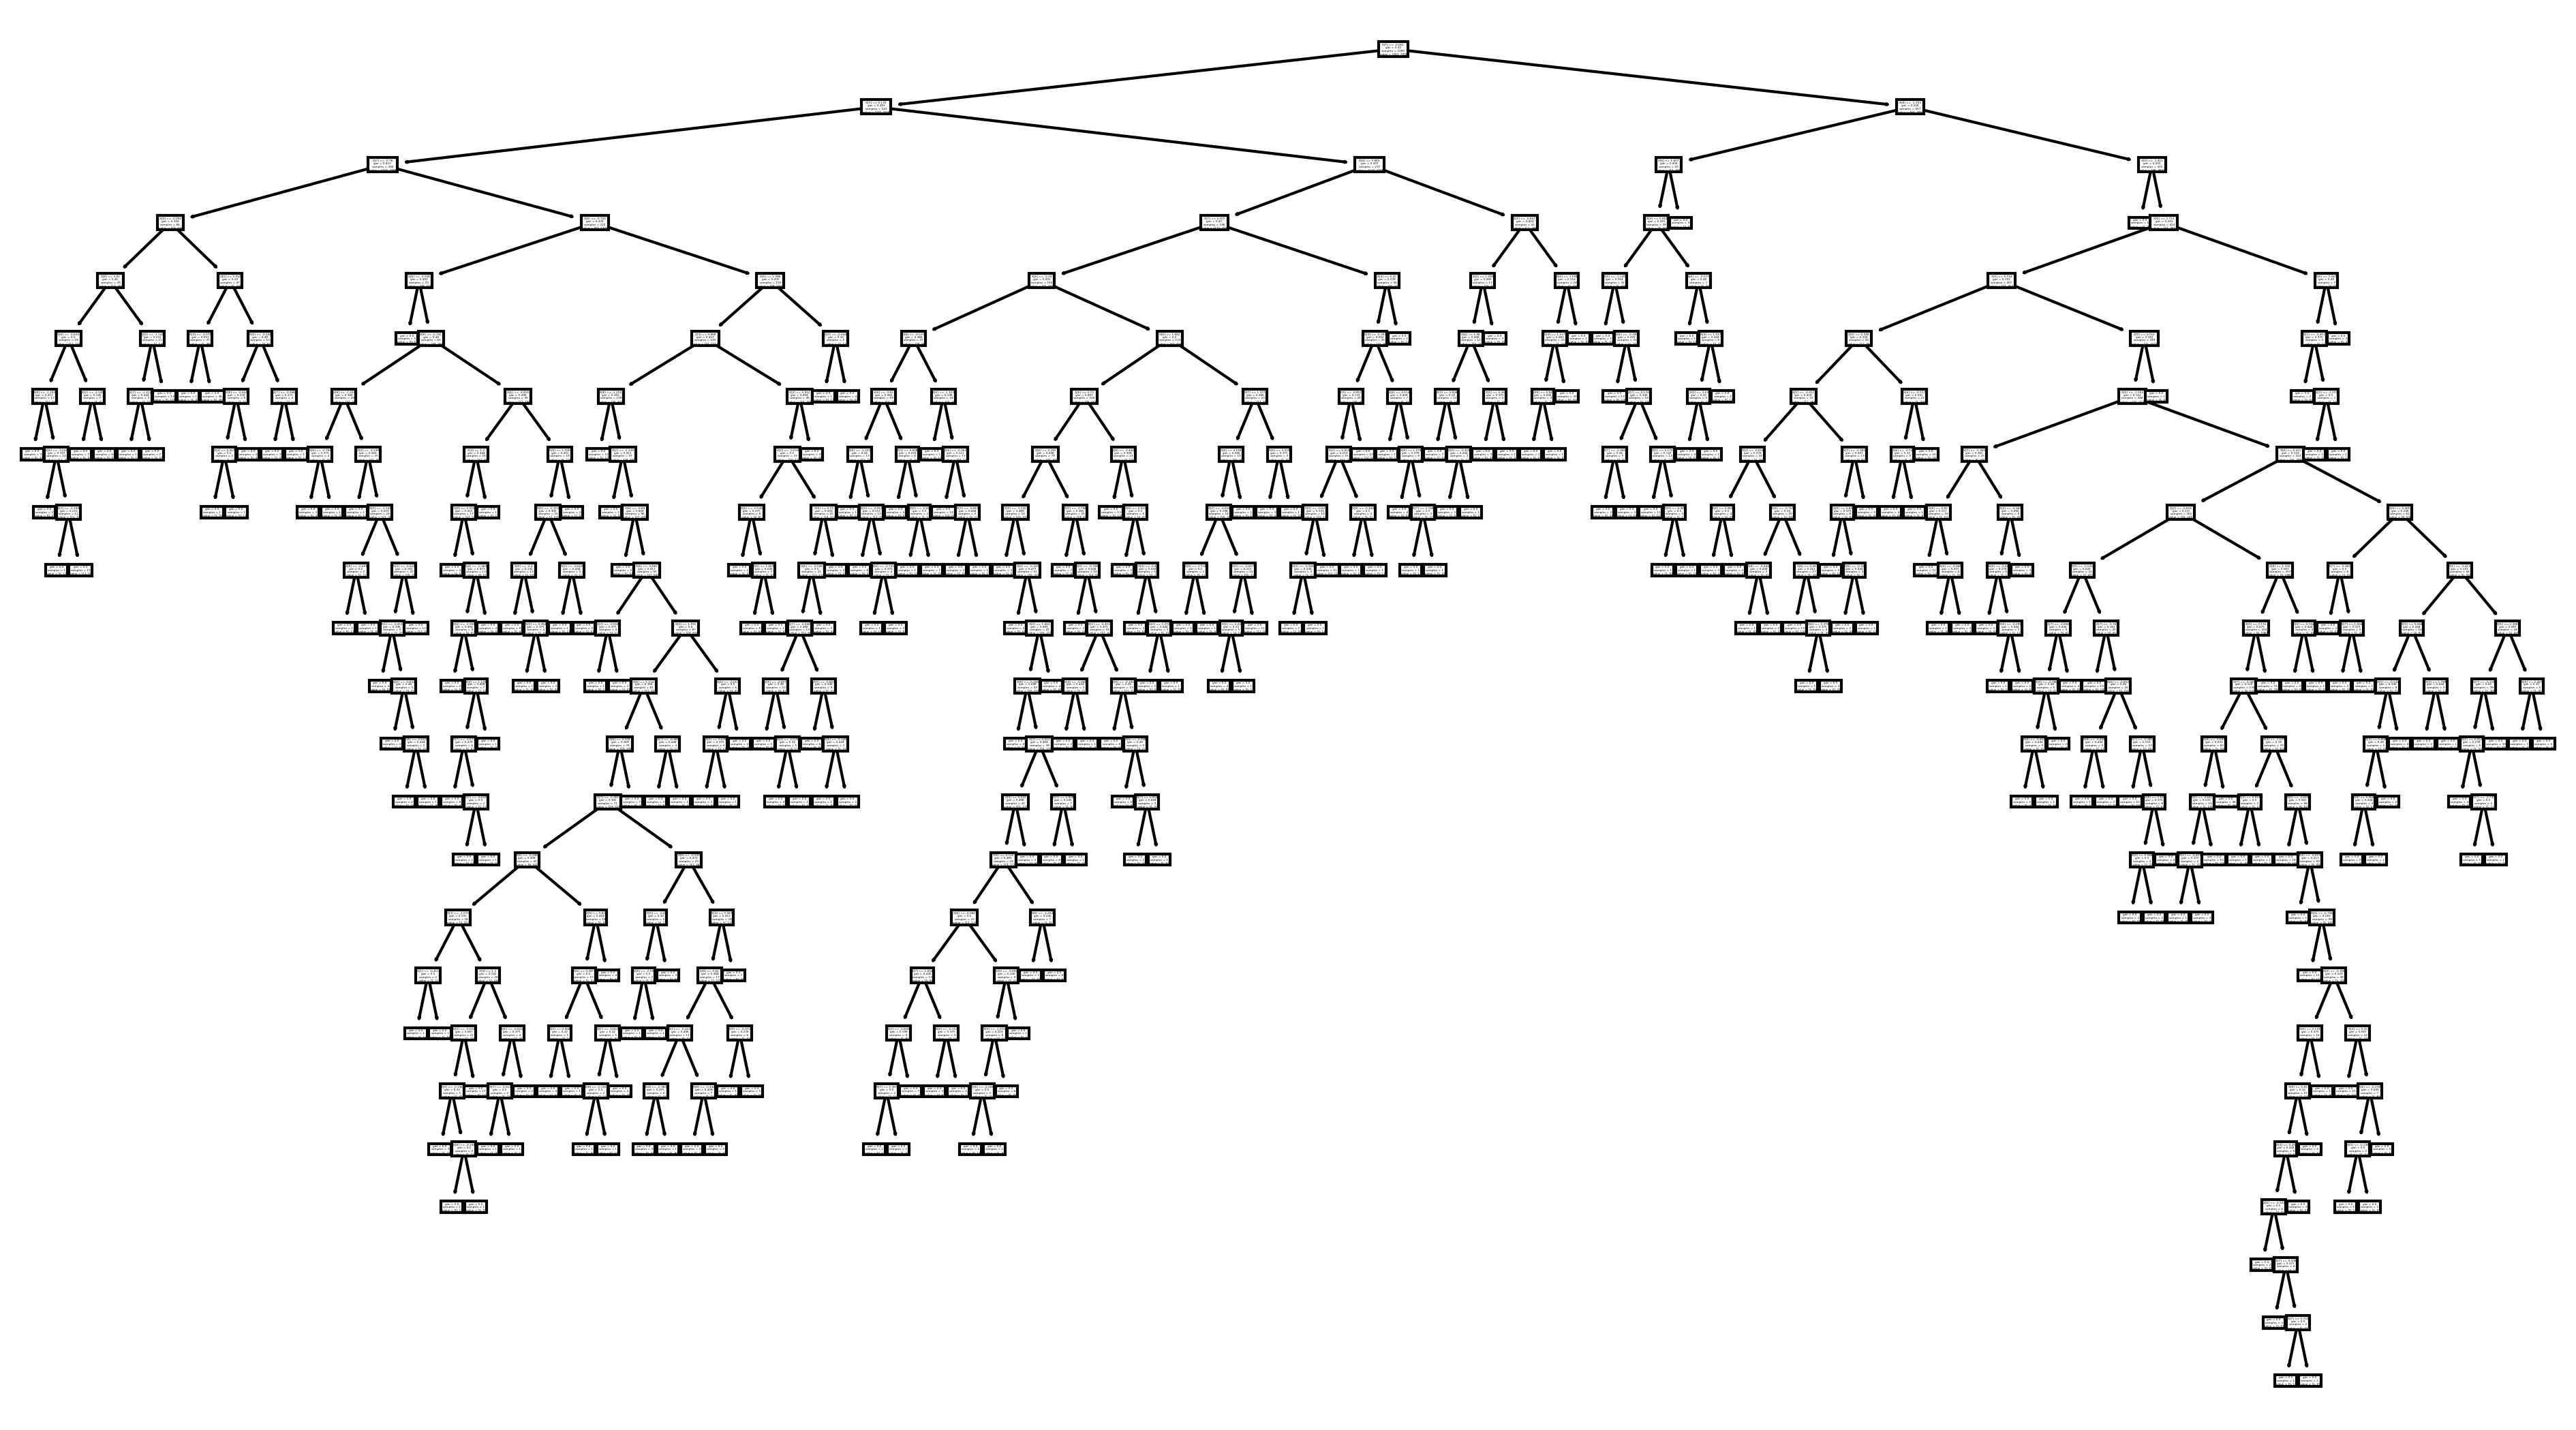

In [18]:
tree.plot_tree(clf)
plt.show()